# Worksheet 18

Name: **Bowen Li**  
UID: **U79057147** 

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

Where does randomness come from?

[-1.08077269e-02  9.83050156e+02]
15.340760939289794


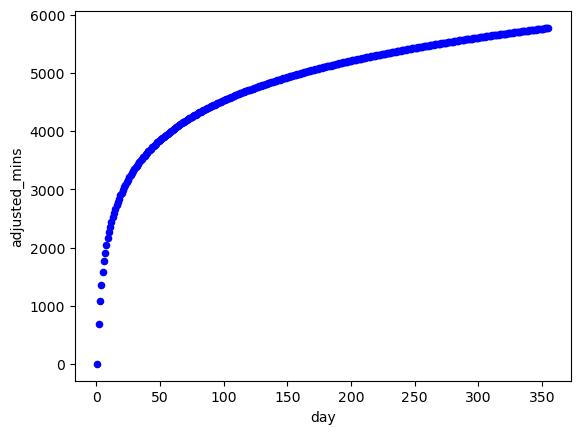

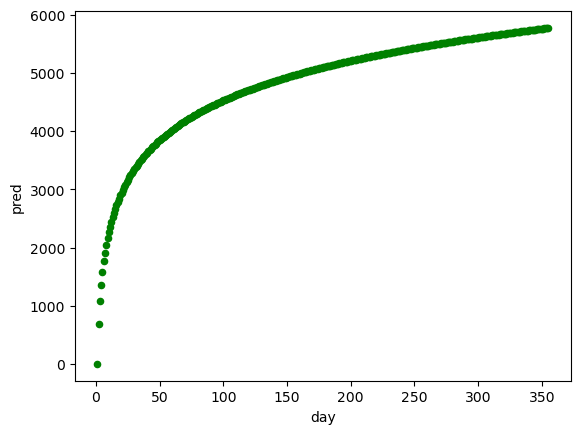

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

alarms = pd.read_csv('data.csv')
alarms['time'] = pd.to_datetime(alarms['alarm (%H:%M:%S)'], format='%H:%M:%S')
alarms['total_minutes'] = (alarms['time'] - alarms['time'][0]).dt.total_seconds() / 60

cycles = 0
adjusted = np.zeros(355)
for i in range(1, 355):
    if alarms['total_minutes'][i] < alarms['total_minutes'][i-1]:
        cycles += 1
    adjusted[i] = alarms['total_minutes'][i] + 1440*cycles

alarms['adjusted_mins'] = adjusted


intercepts = np.ones(355)
adj_mins = alarms['adjusted_mins'].to_numpy()
X = np.array([intercepts, np.log(alarms['day'].to_numpy())]).T

beta_hat = np.linalg.solve(X.T @ X, X.T @ adj_mins)

print(beta_hat)

alarms['pred'] = beta_hat[0] + beta_hat[1] * np.log(alarms['day'].to_numpy())
alarms.plot.scatter(x='day', y='adjusted_mins', c = 'b')
alarms.plot.scatter(x='day', y='pred', c = 'g')

print((beta_hat[0] + beta_hat[1] * np.log(356)) % 1440)

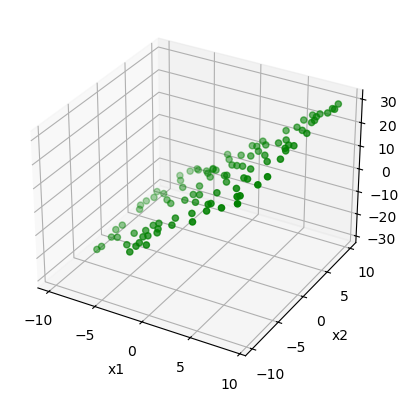

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

SAMPLE_SIZE = 100

# it's possible for y = 3 * x_1 + (1/4) * x_2
# but we don't know to look for x_2 and we only have x_1 as a feature
x1 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
x2 = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = 3 * x1 + (1/4) * x2

# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111,projection='3d')

# and plot the point 
ax.scatter(x1 , x2 , y,  color='green')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

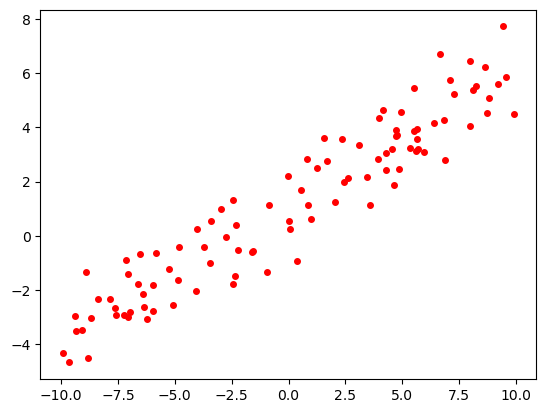

In [3]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 0.5 ])
x = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

[1.11395025 0.49481614]


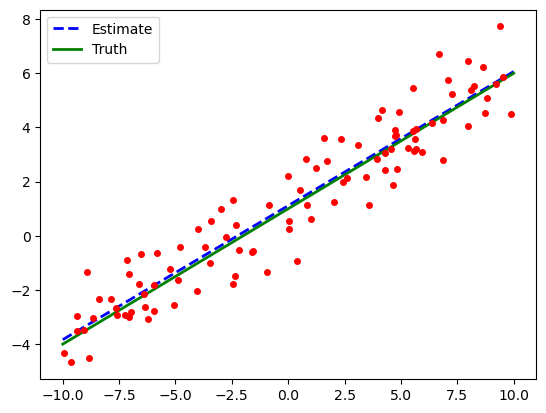

In [4]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.solve(X.T @ X, X.T @ y)
print(beta_hat)
x_plot = np.linspace(-10,10,100)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimate is close to the parameters we used to generate the data.

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

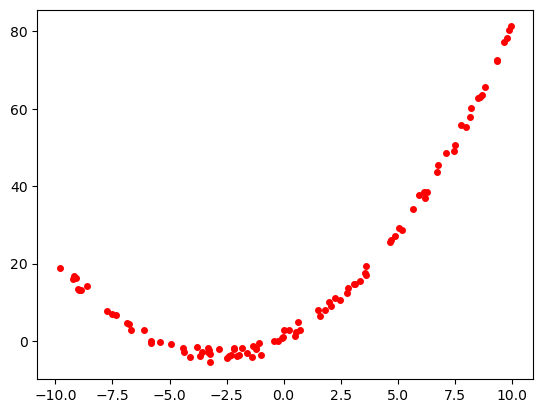

In [5]:
SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3, 0.5 ])
x = -10.0 + 20.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + true_beta[2] * x * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

[0.98198296 2.97468036 0.50096126]


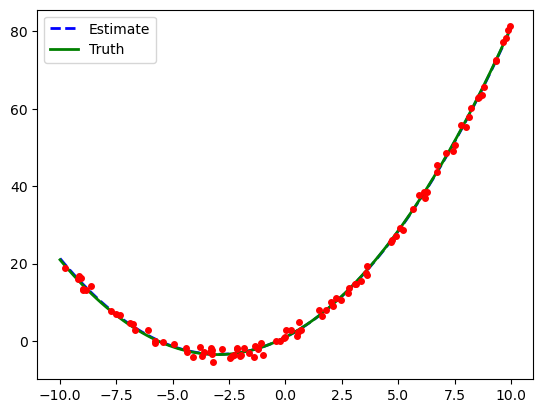

In [6]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x, x**2]).T
beta_hat = np.linalg.solve(X.T @ X, X.T @ y)
print(beta_hat)
x_plot = np.linspace(-10,10,100)
y_est = beta_hat[0] + beta_hat[1] * x_plot + beta_hat[2] * x_plot **2
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot + true_beta[2] * x_plot * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

The estimate is close to the parameters we used to generate the data.

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

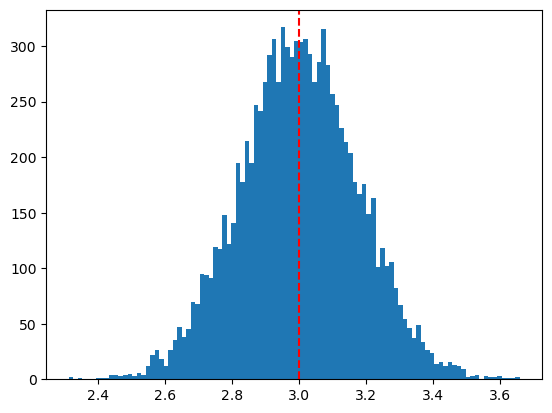

In [7]:
import numpy as np
import matplotlib.pyplot as plt

betas = []
true_beta = np.array([ 1 , 3, 0.5 ])
for _ in range(10000):
    x = -1 + 2 * np.random.random(SAMPLE_SIZE)
    y = true_beta[0] + true_beta[1] * x + true_beta[2] * x * x + np.random.randn(SAMPLE_SIZE)
    intercept = np.ones(np.shape(x)[0])
    X = np.array([intercept, x, x**2]).T
    betas.append(np.linalg.solve(X.T @ X, X.T @ y))

plt.hist(np.array(betas)[:, 1], bins=100)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed')
plt.show()